## Real Estate Price Predictor


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
housing = pd.read_csv("data.csv")

print(housing)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [3]:
housing.head() # quick look

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       499 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


This shows the overall overview of the dataset,since there is no null values then we are good to go.

In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,499.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288992,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.706173,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

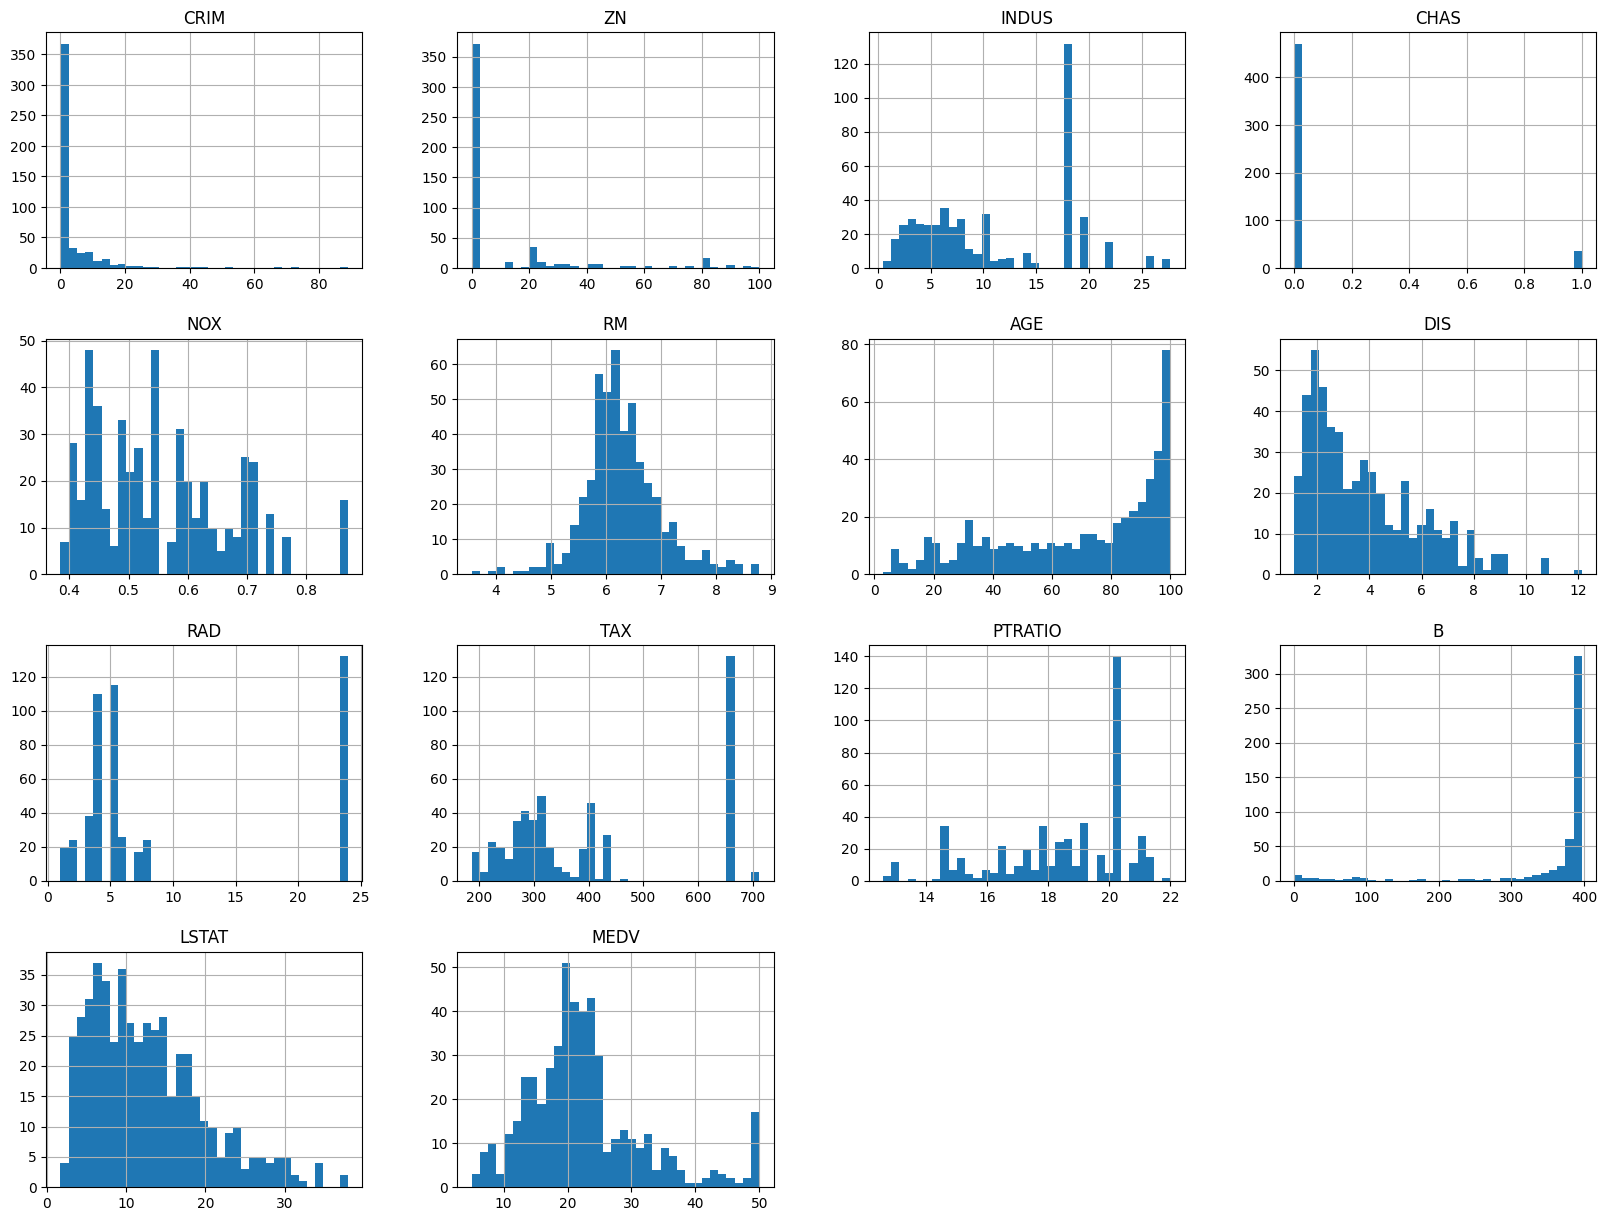

In [7]:
housing.hist(bins=35, figsize=(20,15))

## Train-Test splitting

In [8]:
# def spit_train_test(data, test_ratio):
#     np.random.seed(42) # To avoid randomness nj each & every iteration 
#     shuffled = np.random.permutation(len(data)) #shuffle the length of the hpusingdata
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[: test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return test_indices,train_indices
    
    

In [9]:
# test_set, train_set = spit_train_test(housing, 0.2)
# print("Rows in Train set:", len(train_set), "\nRows in Test set", len(test_set))
# output:
# Rows in Train set: 405 
# Rows in Test set 101

The above code can also done by the sklearn in just few lines .

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print("Rows in Train set:", len(train_set), "\nRows in Test set", len(test_set))

Rows in Train set: 404 
Rows in Test set 102


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
seprate = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in seprate.split(housing, housing['CHAS']):
    strat_train_size = housing.loc[train_index]
    strat_test_size = housing.loc[test_index]
    


In [12]:
strat_train_size['CHAS'].value_counts()


CHAS
0    376
1     28
Name: count, dtype: int64

In [13]:
strat_test_size['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

From the above observation ,the ratio in both the strat_test_size and strat_train_size are almost similiar,that what the startifiedsplit is

In [14]:
housing = strat_train_size.copy()
housing.shape

(404, 14)

In [15]:
corrl_matrix = housing.corr()
corrl_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680223
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

The above observation is clearly shown that our label MEDV is correalted to the few of the features (thta is which are above the neg. values),also depicts if we "increase or dec. the value of the related ones then our label also inc. and vice-a-versa this is caleed the pearson correaltion coeffienct"

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>,
        <Axes: xlabel='AGE', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='B', ylabel='RM'>,
        <Axes: xlabel='AGE', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='B', ylabel='ZN'>,
        <Axes: xlabel='AGE', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='B'>,
        <Axes: xlabel='RM', ylabel='B'>, <Axes: xlabel='ZN', ylabel='B'>,
        <Axes: xlabel='B', ylabel='B'>, <Axes: xlabel='AGE', ylabel='B'>,
        <Axes: xlabel='

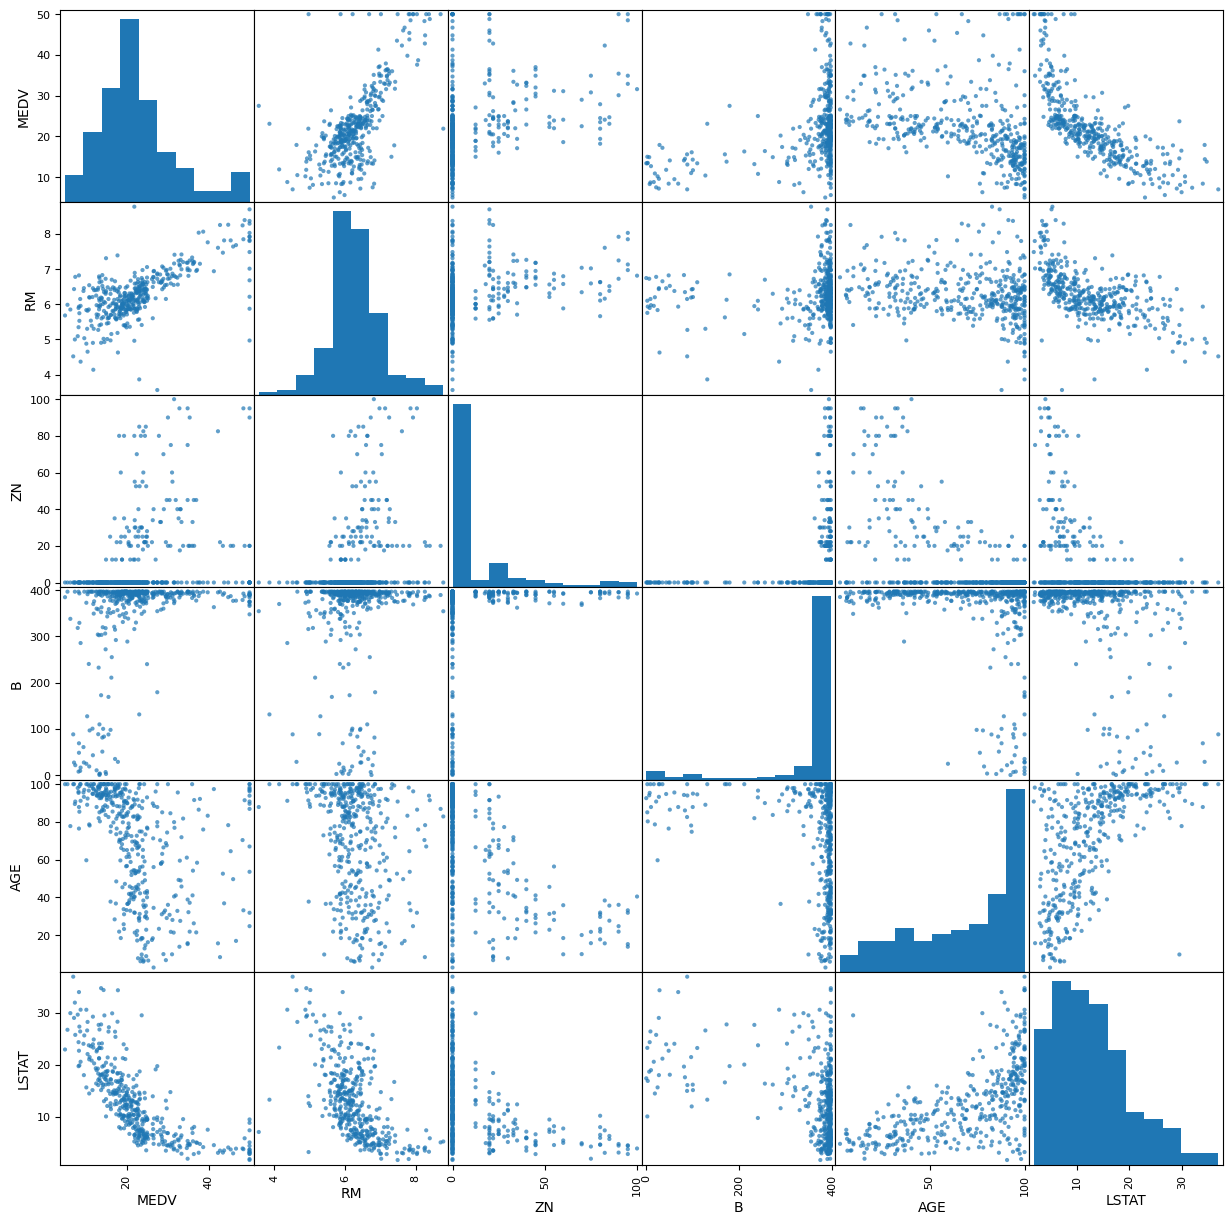

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "B", "AGE","LSTAT"]
scatter_matrix(housing[attributes], figsize=(15,15), alpha=0.7)

<Axes: xlabel='RM', ylabel='MEDV'>

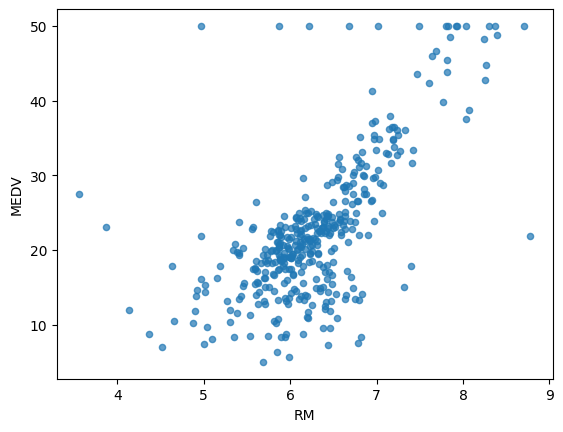

In [17]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.7 )

Strong positive correlation between MEDV and RM

## Combining the features

In [18]:
housing['TPRM'] = housing['TAX']/housing['RM'] 
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


In [19]:
corrl_matrix = housing.corr()
corrl_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680223
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TPRM      -0.528792
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TPRM', ylabel='MEDV'>

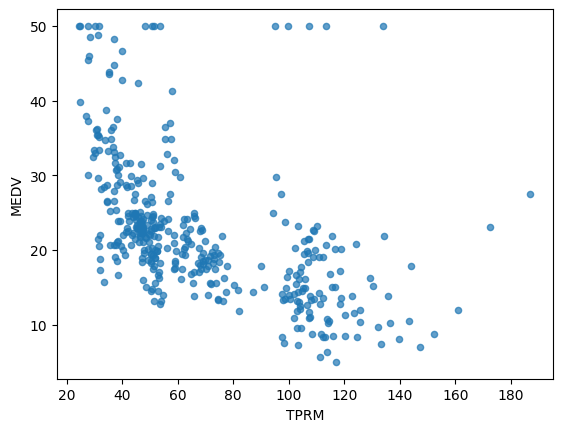

In [20]:
housing.plot(kind='scatter', x='TPRM', y='MEDV', alpha=0.7 )

Strong negative correlation between MEDV and TPRM after LSTAT.

In [21]:
# For to use an input for fit_transform
# Drop the "MEDV" column and assign it to the other variable for output and label.
housing = strat_train_size.drop("MEDV", axis=1)  
housing_labels = strat_train_size["MEDV"].copy() 

## Dealing with missing values 

1. To drop that value,if not affecting the other features (use dropna).
2. To drop the entire column if there are very large no. of the missing values or that may not be relevant for the prediction (use drop).
3. Fill those missings with values like 0 , mean and median (use fillna ).

In [22]:
# Since we have small no. of missing values so we can rely with filling it.
median = housing['RM'].median()
median

6.2175

In [23]:
housing['RM'].fillna(median ,inplace=True)


In [24]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283584,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711531,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [25]:
#OR
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [26]:
#To know the medians of all the features. 
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [27]:
#transform method applies the imputer to data to fill any missing value
#To form a method in such a way that if automatically deals with the missing values in any featue of the dataset

housing_imputed = imputer.transform(housing) 

In [28]:
housing_imputed = pd.DataFrame(housing_imputed)
housing_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


## Creating a Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    
    ('std_scaler', StandardScaler()),
])

In [30]:
housing_tr = my_pipeline.fit_transform(housing)
housing_tr
# Gives numpy array as a result or we can bcos of predictor

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting The Model.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(housing_tr, housing_labels) # since we have to gives features and labels separtely

DecisionTreeRegressor()

In [32]:
#In few of the below cells we have check our model accuracy
some_data = housing.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [33]:
some_labels = housing_labels[:5]
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [34]:
prepared_data = my_pipeline.transform(some_data)

In [35]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

## Evaluating the model.

In [36]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_tr)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)


In [37]:
lin_rmse  # assume lin_rmse as rmse for decision tree ,just for an understanding

0.0

We have observed that from the linear model we encounter the error of around 4.
But in decision tree we face an issue of overfiiting of data due to 0 as an error.

## Evaluating Through :Cross validation

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_tr, housing_labels, scoring="neg_mean_squared_error", cv=10 )
rmse_scores = np.sqrt(-scores)
rmse_scores

array([3.79248294, 5.6938135 , 5.3303091 , 3.65533356, 3.91596093,
       3.19507433, 4.50194402, 3.57659056, 3.47131099, 4.09227932])

we observed that validation of linear reg. is around 4 something.
And in decision tree it was like approx 3 something.


In [39]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Scores:", scores.std())

In [40]:
print_scores(rmse_scores)

Scores: [3.79248294 5.6938135  5.3303091  3.65533356 3.91596093 3.19507433
 4.50194402 3.57659056 3.47131099 4.09227932]
Mean 4.122509924902488
Scores: 0.7761904889767975


Thus random forest is working nicely as compare to the other models.

## Testing The Model

In [41]:
X_test = strat_test_size.drop("MEDV",axis=1)
Y_test = strat_test_size["MEDV"]
X_test_prepared = my_pipeline.transform(X_test)
final_predictions =model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [42]:
final_rmse

4.041294201555909

In [43]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2470756 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [44]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2470756 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

In [45]:
model.predict(features)

array([21.9])